In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # way to ignore the warnnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
amazon=pd.read_csv("Documents/Data/amazon.csv")
amazon.head(4)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction


In [3]:
print("number of rows",amazon.shape[0])

number of rows 550


In [4]:
print("number of columns", amazon.shape[1])

number of columns 7


In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# Algunas transformaciones

In [6]:
amazon["Genre"]=amazon["Genre"].astype("category")

In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         550 non-null    object  
 1   Author       550 non-null    object  
 2   User Rating  550 non-null    float64 
 3   Reviews      550 non-null    int64   
 4   Price        550 non-null    int64   
 5   Year         550 non-null    int64   
 6   Genre        550 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 26.6+ KB


In [8]:
amazon.rename(columns={"Name":"Nombre","Author":"Autor","User Rating":"Popularidad","Reviews":"Reseña",
                      "Price":"Precio","Year":"Año","Genre":"Genero"}, inplace=True)

In [9]:
amazon[:6]

,Nombre,Autor,Popularidad,Reseña,Precio,Año,Genero
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


In [33]:
amazon["Popularidad"].unique()


bins=[0,4,4.8,7]
labels=["Bajo","Medio","Alto"]

amazon["Niveles"]=pd.cut(amazon["Popularidad"], bins, labels=labels)

amazon.head(5)

,Nombre,Autor,Popularidad,Reseña,Precio,Año,Genero,Niveles
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Medio
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Medio
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Medio
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Medio
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Medio


Medio    477
Alto      52
Bajo      21
Name: Niveles, dtype: int64


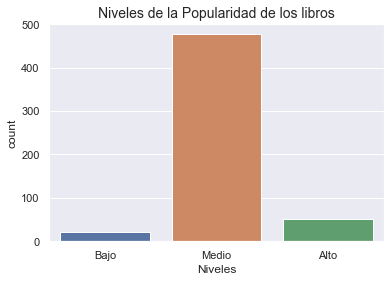

In [12]:
niveles=amazon["Niveles"].value_counts()
print(niveles)
ax=sns.countplot(amazon["Niveles"])
ax.set_title("Niveles de la Popularidad de los libros", fontsize=14)
plt.show()

<AxesSubplot:xlabel='Año', ylabel='Precio'>

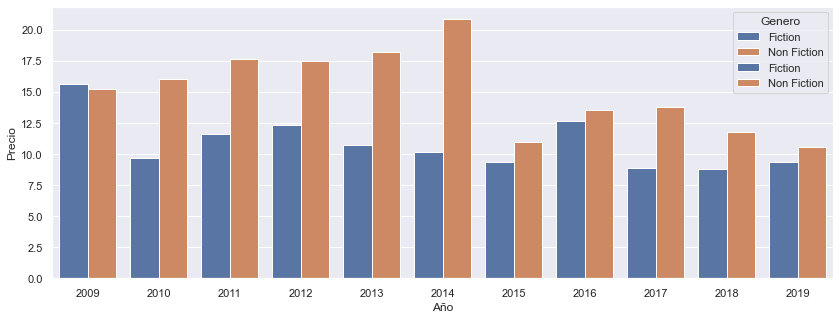

In [15]:
df_1=fiction[["Año","Genero","Precio"]].groupby(by=["Año","Genero"]).mean().reset_index()
df2=no_fiction[["Año","Genero","Precio"]].groupby(by=["Año","Genero"]).mean().reset_index()
df_1

plt.figure(figsize=(14,5))
sns.barplot(data=df_1, x="Año",y="Precio", hue="Genero")
sns.barplot(data=df2, x="Año", y="Precio", hue="Genero")


In [17]:
# ultima modificacion
amazon.drop("Nombre", axis=1, inplace=True)

In [18]:
#Version final de mi transformacion de mi base de datos
amazon[:6]

,Autor,Popularidad,Reseña,Precio,Año,Genero,Niveles
0,JJ Smith,4.7,17350,8,2016,Non Fiction,Medio
1,Stephen King,4.6,2052,22,2011,Fiction,Medio
2,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Medio
3,George Orwell,4.7,21424,6,2017,Fiction,Medio
4,National Geographic Kids,4.8,7665,12,2019,Non Fiction,Medio
5,George R. R. Martin,4.4,12643,11,2011,Fiction,Medio


In [22]:
años_1=[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [25]:
for i in años_1:
    hello=amazon.loc[(amazon["Niveles"]=="Alto") & (amazon["Año"]== i)]
    
    
nuevo=pd.DataFrame(data=hello)
nuevo.shape

(11, 7)

In [26]:
nuevo

,Autor,Popularidad,Reseña,Precio,Año,Genero,Niveles
41,Bill Martin Jr.,4.9,14344,5,2019,Fiction,Alto
84,Dav Pilkey,4.9,7235,4,2019,Fiction,Alto
85,Dav Pilkey,4.9,12619,8,2019,Fiction,Alto
86,Dav Pilkey,4.9,9089,8,2019,Fiction,Alto
155,J. K. Rowling,4.9,7758,18,2019,Fiction,Alto
252,Dr. Seuss,4.9,21834,8,2019,Fiction,Alto
303,Nathan W. Pyle,4.9,9382,6,2019,Fiction,Alto
482,Eric Carle,4.9,19546,5,2019,Fiction,Alto
489,Emily Winfield Martin,4.9,8842,10,2019,Fiction,Alto
521,Mark R. Levin,4.9,5956,11,2019,Non Fiction,Alto


# Filtrado de la base de datos segun el Precio y el Año

In [45]:
filtrar=amazon[["Precio","Año"]].groupby("Año").mean()
filtrar

,Precio
Año,
2009,15.40
2010,13.48
2011,15.10
2012,15.30
2013,14.60
2014,14.64
2015,10.42
2016,13.18
2017,11.38


<AxesSubplot:xlabel='Año'>

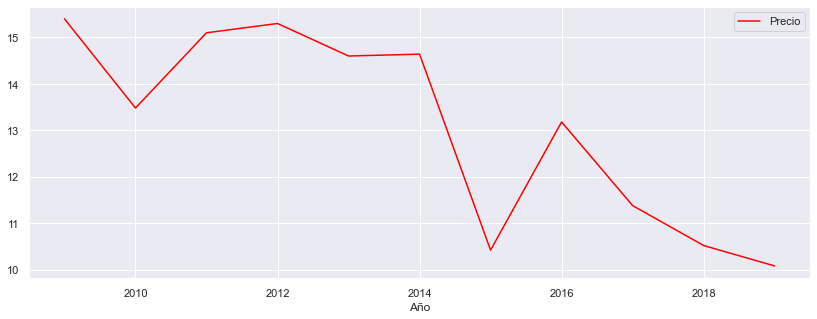

In [46]:
fig,ax=plt.subplots(figsize=(14,5))
filtrar.plot(ax=ax, color="red")


In [14]:
fiction=amazon[amazon["Genero"]=="Fiction"]
no_fiction=amazon[amazon["Genero"]=="Non Fiction"]

In [48]:
filtrar_fiction=fiction[["Año","Genero","Precio"]].groupby(by=["Año"]).mean()
filtrar_nonfiction=no_fiction[["Año","Genero","Precio"]].groupby(by=["Año"]).mean()

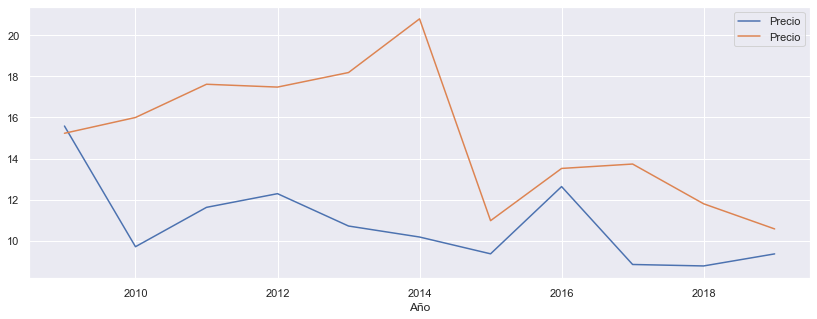

In [49]:
filtrar_fiction.Precio.plot(figsize=(14,5))
plt.legend("--")
filtrar_nonfiction.Precio.plot(figsize=(14,5))
plt.legend()
plt.show()

# Popularidad del libro segun el genero

In [50]:
best_fiction=fiction[["Año","Reseña","Genero"]].groupby(by="Año").sum()
best_no_fiction=no_fiction[["Año","Reseña","Genero"]].groupby("Año").sum()

<AxesSubplot:xlabel='Año'>

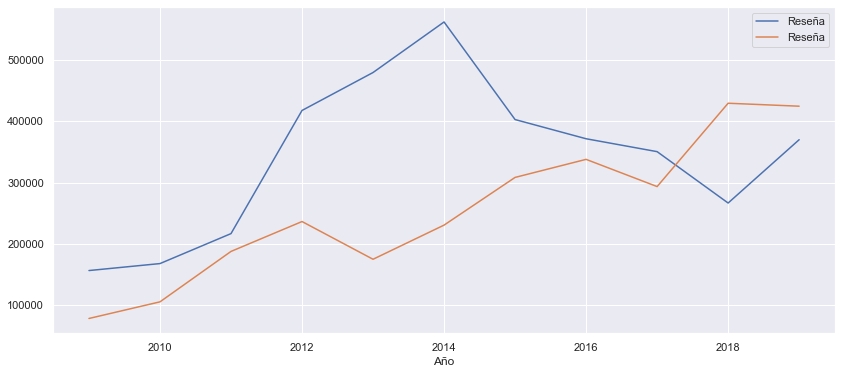

In [51]:
fig,ax=plt.subplots(figsize=(14,6))
best_fiction.plot(ax=ax)
best_no_fiction.plot(ax=ax)

In [52]:
re_fiction=fiction[["Año","Popularidad","Genero"]].groupby(by="Año").sum()
re_no_fiction=no_fiction[["Año","Popularidad","Genero"]].groupby("Año").sum()

<AxesSubplot:xlabel='Año'>

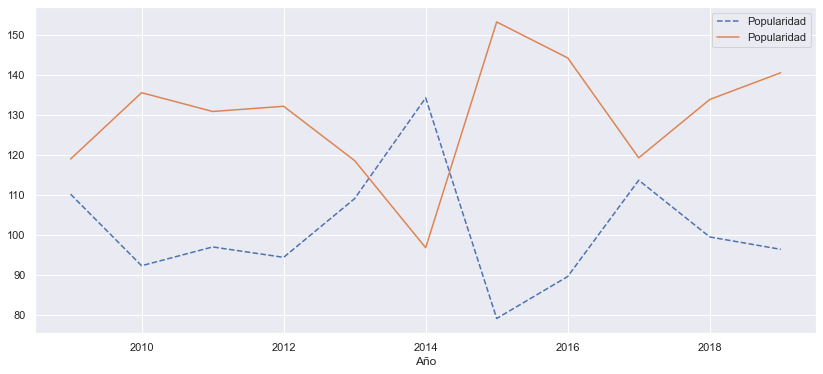

In [53]:
fig,ax=plt.subplots(figsize=(14,6))
re_fiction.plot(ax=ax, style="--")
re_no_fiction.plot(kind="line", ax=ax)

# Genero con mayor cantidad de libros

In [27]:
genero=amazon["Genero"].value_counts()
genero

Non Fiction    310
Fiction        240
Name: Genero, dtype: int64

<AxesSubplot:xlabel='Genero', ylabel='count'>

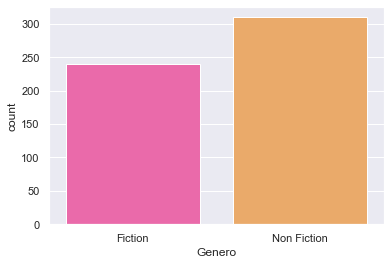

In [42]:
sns.countplot(amazon["Genero"], palette="spring")

In [58]:
amazon

,Nombre,Autor,Popularidad,Reseña,Precio,Año,Genero
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [46]:
mean_0=amazon[["Popularidad","Reseña","Precio"]]
mean_1=fiction[["Popularidad","Reseña","Precio"]]
mean_2=no_fiction[["Popularidad","Reseña","Precio"]]

tabla=np.zeros((3,3))


tabla[:,0]=mean_0.mean().values
tabla[:,1]=mean_1.mean().values
tabla[:,2]=mean_2.mean().values

tabla_pandas=pd.DataFrame(tabla, columns=["All","Fiction","Non Fiction"])
tabla_pandas.index=["Popularidad","Reseña","Precio"]
tabla_pandas

,All,Fiction,Non Fiction
Popularidad,4.618364,4.648333,4.595161
Reseña,11953.281818,15683.791667,9065.145161
Precio,13.100000,10.850000,14.841935
